In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd -q ..

c:\Users\mjaic\miniconda3\envs\lcpfn\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
import lcpfn 
import numpy as np
from matplotlib import pyplot as plt

## Generate samples from LC prior

(0.0, 1.0)

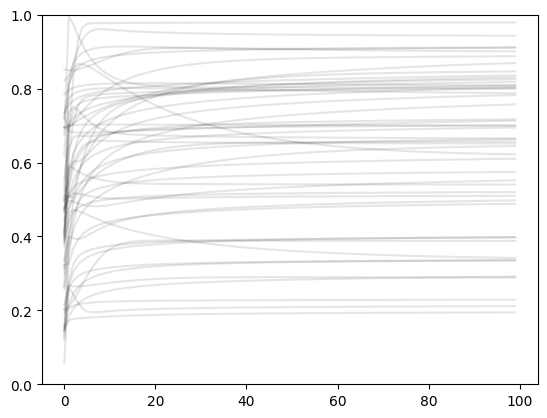

In [4]:
for _ in range(50):
    prior = lcpfn.sample_from_prior(np.random)
    curve, _ = prior()
    plt.plot(curve, "black", alpha=0.1)
plt.ylim(0, 1)

## Train a PFN model with the previous learning curve prior

In [5]:
get_batch_func = lcpfn.create_get_batch_func(prior=lcpfn.sample_from_prior)

In [6]:
# example of a batch

X, Y, Y_noisy = get_batch_func(batch_size=100, seq_len=100, num_features=1)
print(X.shape, Y.shape, Y_noisy.shape)

torch.Size([100, 100, 1]) torch.Size([100, 100]) torch.Size([100, 100])


In [7]:
# Main function to train a PFN model

lcpfn.train_lcpfn

<function lcpfn.train_lcpfn.train_lcpfn(get_batch_func, seq_len: int = 100, emsize: int = 512, nlayers: int = 12, num_borders: int = 1000, lr: float = 0.001, batch_size: int = 100, epochs: int = 1000)>

In [8]:
# train a small model for 3 epochs

result = lcpfn.train_lcpfn(get_batch_func=get_batch_func, 
                          seq_len=100,
                         emsize=256,
                         nlayers=3,
                         num_borders=1000,
                         lr=0.001,
                         batch_size=10,
                         epochs=3)

Using 1000000 y evals to estimate 1000 buckets. Cut off the last 0 ys.
Using cpu:0 device
init dist
Not using distributed
DataLoader.__dict__ {'num_steps': 100, 'get_batch_kwargs': {'batch_size': 10, 'eval_pos_seq_len_sampler': <function train.<locals>.eval_pos_seq_len_sampler at 0x000001D3F36D7700>, 'seq_len_maximum': 100, 'device': 'cpu:0', 'num_features': 1, 'hyperparameters': {}}, 'num_features': 1}
Style definition: None
Using a Transformer with 2.23 M parameters


c:\Users\mjaic\miniconda3\envs\lcpfn\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
c:\Users\mjaic\OneDrive\Desktop\Delft\Year 1\Q3\Deep Learning\deep-learning-project\lcpfn\lcpfn\bar_distribution.py:22: UserWarning: torch.searchsorted(): input value tensor is non-contiguous, this will lower the performance due to extra data copy when converting non-contiguous tensor to contiguous, please use contiguous input value tensor if possible. This message will only appear once per program. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen/native/BucketizationUtils.h:28.)
  target_sample = torch.searchsorted(self.borders, y) - 1


-----------------------------------------------------------------------------------------
| end of epoch   1 | time: 18.81s | mean loss -0.66 | pos losses   nan,  nan, 0.68,-0.29,-0.68,  nan,-0.32,  nan,-0.58,-0.63,-0.70,-0.32,-0.97,  nan,-0.77,  nan,-0.40,-1.05,  nan,-0.58,-0.81,-0.55,-0.52,-0.79,-0.61,-1.15,-0.76,-0.76,-1.18,-1.20,  nan,-0.43,-0.29,  nan,-0.59,  nan,-1.14,-0.43,  nan,-0.78,  nan,-0.23,-0.90,-0.78,  nan,  nan,  nan,  nan,  nan,-0.89,-0.90,-0.66,-0.40,  nan,-0.04,-1.12,-0.10,  nan,-0.40,  nan,-0.71,-0.11,  nan,  nan,-1.07,-0.81,-0.74,  nan,-0.43,  nan,-0.94,  nan,-0.06,  nan,-1.14,-0.61,  nan,-1.04,  nan,-0.23,  nan,  nan,-1.04,-0.61,  nan,-0.70,  nan,-1.14,  nan, 0.00,-0.38,  nan,  nan,-0.39,-0.79,-0.77,  nan,  nan,  nan,-0.50, lr 0.001 data time  0.01 step time  0.14 forward time  0.05
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
| en

In [9]:
# Get the trained model

model = result[2]
print(model)

TransformerModel(
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
        )
        (linear1): Linear(in_features=256, out_features=512, bias=True)
        (dropout): Dropout(p=0.2, inplace=False)
        (linear2): Linear(in_features=512, out_features=256, bias=True)
        (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.2, inplace=False)
        (dropout2): Dropout(p=0.2, inplace=False)
      )
      (1): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
        )
        (linear1): Linear(in_features=256, out_features=512, bias=True)
        (dropout): Dro